In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Language Detection.csv.zip')

In [3]:
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [4]:
df.isna().sum()

Text        0
Language    0
dtype: int64

In [5]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [6]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [7]:
df.shape

(10271, 2)

In [8]:
df["Language"].nunique()

17

In [9]:
df.Language.value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

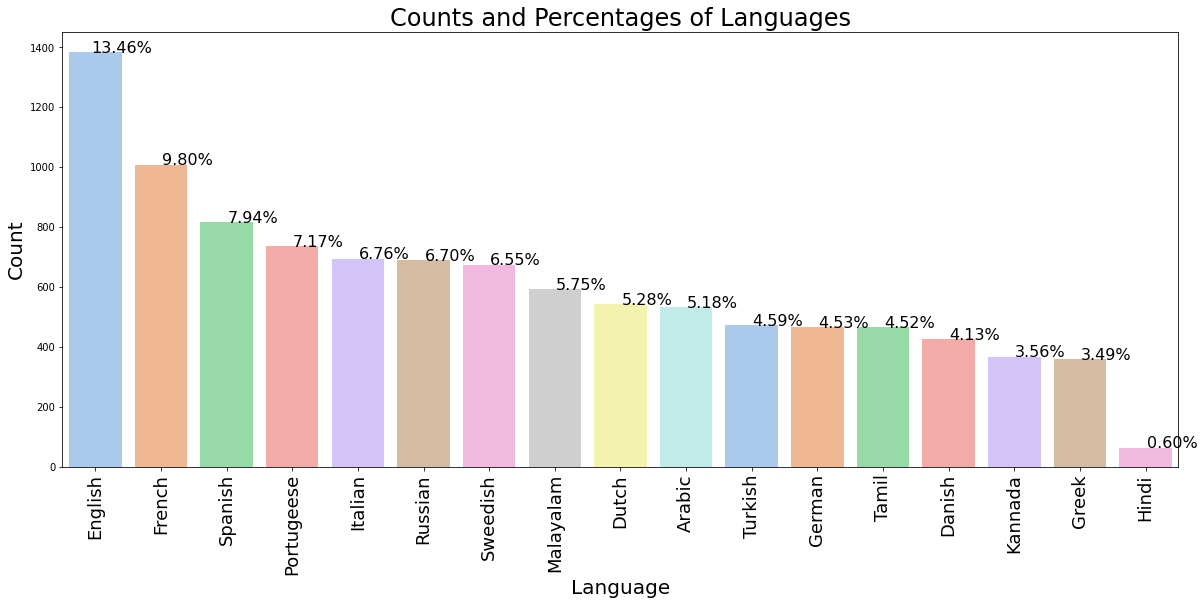

In [10]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'pastel')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [11]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [12]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [13]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [14]:
X= df1["cleaned_Text"]
y= df1["Language"]

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= encoder.fit_transform(y)
y.shape

(10271,)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10271, 39370)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

In [19]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: user 4min 8s, sys: 602 ms, total: 4min 9s
Wall time: 4min 15s


In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([16, 16,  4, ...,  3, 14,  2])

In [22]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [23]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.524
Random Forest accuracy score :  0.924
MNB accuracy score :  0.981
CPU times: user 1min 34s, sys: 1.59 s, total: 1min 36s
Wall time: 51.2 s


In [24]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.58      0.35      0.44       146
           1       0.76      0.55      0.64       103
           2       0.87      0.46      0.60       133
           3       0.97      0.59      0.74       361
           4       0.89      0.56      0.69       255
           5       0.84      0.46      0.59       114
           6       1.00      0.48      0.65        79
           7       1.00      0.33      0.50        12
           8       0.97      0.45      0.61       159
           9       0.08      0.97      0.16        86
          10       0.81      0.72      0.76       161
          11       0.90      0.48      0.63       178
          12       0.79      0.29      0.43       150
          13       0.79      0.55      0.65       205
          14       0.99      0.49      0.66       182
          15       0.41      0.86      0.55       111
       

K-Nearest Neighbors ConfusionMatrix


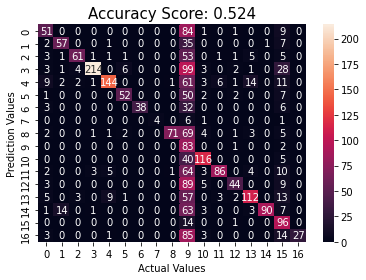

******************************
 
Random Forest ConfusionMatrix


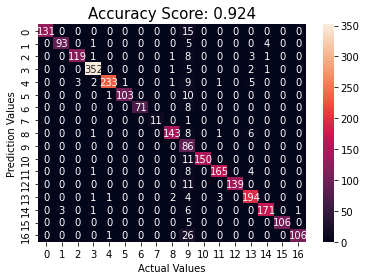

******************************
 
MNB ConfusionMatrix


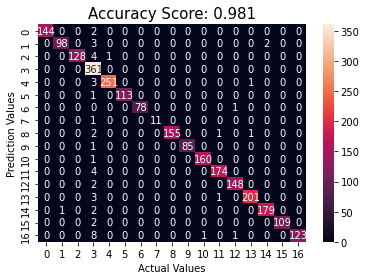

******************************
 


In [25]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

In [26]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [27]:
prediction("до свидания ")

This word/sentence contains Russian word(s).


In [28]:
prediction("Η μνήμη σας βελτιώνεται καθώς μαθαίνετε μια γλώσσα. ")

This word/sentence contains Greek word(s).


In [29]:
prediction("ನಿಮ್ಮ ಮೆದುಳು ಸ್ವಯಂಚಾಲಿತವಾಗಿ ಅನುವಾದಿಸುವುದರಿಂದ ")

This word/sentence contains Kannada word(s).


In [30]:
#Predict and Summarize the Text

In [31]:
# This is the inital text of the full text
prediction("Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. When the appellant was away for his work, his wife, Sylvia, nurtured an illicit relationship with Mr. Ahuja, a friend of Nanavati. On 27th April 1959 , Nanavati returned from one of his long voyages. ")


This word/sentence contains English word(s).


In [32]:
!pip install -q bert-extractive-summarizer
!pip install -q spacy==2.1.3
!pip install -q transformer==2.2.2
!pip install -q neuralcoref

ERROR: Could not find a version that satisfies the requirement transformer==2.2.2 (from versions: none)
ERROR: No matching distribution found for transformer==2.2.2


In [33]:
from summarizer import Summarizer
from pprint import pprint

In [34]:
#bert exctractive summarizer
text="""Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. When the appellant was away for his work, his wife, Sylvia, nurtured an illicit relationship with Mr. Ahuja, a friend of Nanavati.
On 27th April 1959 , Nanavati returned from one of his long voyages. When he came home, his wife seemed to be behaving strangely and was not responsive or affectionate to him. Sensing something, he asked, to which Sylvia confessed about her affair with Ahuja. That evening, Nanavati dropped Sylvia (wife) and their two children at a cinema hall and went to confront Ahuja. He first went to his ship, collected his pistol on a false pretext from the stores along with six bullets, completed his official duties and continued for Prem Ahuja's office. On not finding him there, he made his way to Ahuja's home where he found Ahuja. There was a verbal confrontation between the two men. After the confrontation, there was an altercation after which three shots were fired and Prem Ahuja dropped dead. Nanavati headed straight to confess to the Provost Marshal of the Western Naval Command and later turned himself over to the Deputy Commissioner of Police.
The jury found him not guilty of murder which did not find favour with the Sessions Judge and he referred the case to Bombay High Court. The Bombay High Court dismissed the Jury's decision and convicted Nanavati under section 302 and 304 Part 1 of IPC.
Nanavati filed an appeal before the Supreme Court.
The issue of the case was whether Nanavati shot Ahuja in the "heat of the moment" or whether it was a premeditated murder which will determine the conviction of Nanavati.
The first contention that was raised was that Ahuja had just come out of the shower wearing towel. When his body was discovered, his towel was still intact on his body. It had neither loosened nor fallen off which was highly improbable in case of a scuffle. Moreover, after Sylvia's confession, a calm and collected Nanavati took them to a movie hall, dropped them there and then went to his shop to retrieve his pistol, that too under a false pretext. This shows he had enough cooling time and provocation was neither grave nor sudden and that Nanavati had planned the murder. Moreover, according to the testimony of Ahuja's servant, Anjani, who was present at the house during the occurrence of the incident and so, was a natural witness, testified that there were four shots consecutively in quick succession and the entire event occurred in less than a minute thereby ruling out scuffle. Nanavati walked out of Ahuja's residence, without explaining to his sister Mamie, who was present in another room of the flat that it was an accident. The deputy commissioner of police testified that Nanavati confessed that he had shot dead Ahuja and even corrected the misspelling of his name in the police record thereby showing Nanavati was not dazed.
The Supreme Court upheld that this was a clear case of premeditated murder and concurred with the decision of the High Court and sentenced him to life imprisonment for culpable homicide amounting to murder.
"""

In [35]:
data=text.replace("\ufeff","")

In [36]:
data[0:100]

'Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of decea'

In [37]:
model=Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
result=model(data,max_length=400,min_length=100)

In [39]:
full=''.join(result)

In [40]:
pprint(full)

('Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was '
 'charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 '
 'of IPC. This shows he had enough cooling time and provocation was neither '
 'grave nor sudden and that Nanavati had planned the murder. Moreover, '
 "according to the testimony of Ahuja's servant, Anjani, who was present at "
 'the house during the occurrence of the incident and so, was a natural '
 'witness, testified that there were four shots consecutively in quick '
 'succession and the entire event occurred in less than a minute thereby '
 "ruling out scuffle. Nanavati walked out of Ahuja's residence, without "
 'explaining to his sister Mamie, who was present in another room of the flat '
 'that it was an accident.')


In [ ]:
#Distilbert version of bert base model
model1 = Summarizer('distilbert-base-uncased')

In [44]:
result1=model1(data,max_length=400,min_length=100)

In [45]:
full1=''.join(result1)

In [46]:
pprint(full1)

('Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was '
 'charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 '
 'of IPC. The jury found him not guilty of murder which did not find favour '
 'with the Sessions Judge and he referred the case to Bombay High Court. '
 "Moreover, after Sylvia's confession, a calm and collected Nanavati took them "
 'to a movie hall, dropped them there and then went to his shop to retrieve '
 'his pistol, that too under a false pretext. Moreover, according to the '
 "testimony of Ahuja's servant, Anjani, who was present at the house during "
 'the occurrence of the incident and so, was a natural witness, testified that '
 'there were four shots consecutively in quick succession and the entire event '
 'occurred in less than a minute thereby ruling out scuffle.')


In [47]:
#hugging face transformer
from transformers import pipeline

In [ ]:
summarizer = pipeline("summarization")

In [49]:
summarizer(full, max_length=150, min_length=100, do_sample=False)

[{'summary_text': ' Kawas Manekshaw Nanavati, a commander in the Indian Navy was charged for murder of deceased Prem Ahuja . He was charged under section 302 and 304, part 1 of IPC . This shows he had enough cooling time and provocation was neither grave nor sudden . The entire event occurred in less than a minute thereby ruling out scuffle . The servant who was present at the house during the incident testified that there were four shots consecutively in quick succession and the entire event .'}]

In [50]:
import time
start = time.time()
resp=model(data)
end = time.time()

print(f'Response Time: {end-start}')
print(f'Summary: {resp}')

Response Time: 14.2130606174469
Summary: Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. On not finding him there, he made his way to Ahuja's home where he found Ahuja. After the confrontation, there was an altercation after which three shots were fired and Prem Ahuja dropped dead. This shows he had enough cooling time and provocation was neither grave nor sudden and that Nanavati had planned the murder. Moreover, according to the testimony of Ahuja's servant, Anjani, who was present at the house during the occurrence of the incident and so, was a natural witness, testified that there were four shots consecutively in quick succession and the entire event occurred in less than a minute thereby ruling out scuffle.


In [54]:
resp

"Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. On not finding him there, he made his way to Ahuja's home where he found Ahuja. After the confrontation, there was an altercation after which three shots were fired and Prem Ahuja dropped dead. This shows he had enough cooling time and provocation was neither grave nor sudden and that Nanavati had planned the murder. Moreover, according to the testimony of Ahuja's servant, Anjani, who was present at the house during the occurrence of the incident and so, was a natural witness, testified that there were four shots consecutively in quick succession and the entire event occurred in less than a minute thereby ruling out scuffle."

In [51]:
start1 = time.time()
resp1=model1(data)
end1 = time.time()

print(f'Response Time: {end1-start1}')
print(f'Summary: {resp1}')

Response Time: 2.2447543144226074
Summary: Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. There was a verbal confrontation between the two men. The jury found him not guilty of murder which did not find favour with the Sessions Judge and he referred the case to Bombay High Court. When his body was discovered, his towel was still intact on his body. Moreover, after Sylvia's confession, a calm and collected Nanavati took them to a movie hall, dropped them there and then went to his shop to retrieve his pistol, that too under a false pretext.


In [53]:
resp1

"Appellant, Kawas Manekshaw Nanavati , a commander in the Indian Navy was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC. There was a verbal confrontation between the two men. The jury found him not guilty of murder which did not find favour with the Sessions Judge and he referred the case to Bombay High Court. When his body was discovered, his towel was still intact on his body. Moreover, after Sylvia's confession, a calm and collected Nanavati took them to a movie hall, dropped them there and then went to his shop to retrieve his pistol, that too under a false pretext."

In [52]:
start2 = time.time()
resp2=summarizer(data)
end2 = time.time()

print(f'Response Time: {end2-start2}')
print(f'Summary: {resp2}')

Response Time: 14.40428900718689
Summary: [{'summary_text': ' Kawas Manekshaw Nanavati was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC . The Supreme Court upheld that this was a clear case of premeditated murder and sentenced him to life imprisonment for culpable homicide amounting to murder .'}]


In [55]:
resp2

[{'summary_text': ' Kawas Manekshaw Nanavati was charged for murder of deceased Prem Ahuja under section 302 and 304, part 1 of IPC . The Supreme Court upheld that this was a clear case of premeditated murder and sentenced him to life imprisonment for culpable homicide amounting to murder .'}]